#**Autoencoders**

In the previous step we described how methods such as Neural Networks or linear regresion could be used to make predictions. We also discussed in previous steps how Principal Components could be used to both reduce dimensionality and help remove noise.
Autoencoders are a form of unsupervised technique which use neural networks to help reduce dimensionality or remove noise by compressing our input data through a hidden layer back to an orginal represention of the input layer. Figure 1 shows how the network desompresses the data before recreating it in the output layer.

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/autoencoder.png"/>

Figure 1 [Source](https://www.jeremyjordan.me/autoencoders/)

We examine this process a little more by looking at Figure 2 where we see there is an "Encoder" and "Decoder" used to create "h" the latent representation. The latent representation can then be used as a decompressed or dimensionally reduced dataset.

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/Autoencoder_2.png"/>

Figure 2 (source: [Towards Data Science](https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f))

Autoencoders are only useful when there are realtionships between the input variables, as mathematically it is difficuly to compress the features without substanial loss of information, if there was no correlation between the variables. However, if there is a relationship then the structure can be learned, and we can effectively compress our data into a hidden layer. The outcome variable is a transformed version of the hidden nodes. Thus the output variables can be considered to be denoised.

Now we have outlined that Autoencoders can be used for dimensionality reduction as we will be creating a lower number of latent variables than the number of original input variables. This is similar to PCA. So what are there the differences?

* PCA is a linear transformation of the data and assumes the new latent variables are linear combination of the original variables.

* PCA features are not linearly correlated but Autoencoders might have correlations

* PCA is less computationally intensive than Autoencoders.

* A single layered autoencoder with a linear activation function is very similar to PCA.

* Autoencoders may require regularisation as they are prone to overfitting.

In the code below we are will build an autoencoder using Keras. The dataset is the Minst dataset which composes of 60000 images of numbers. Each picture has 28x28 (784) pixels. We will flatten each picture into a single vector and then use these vectors as training data to or Neural Network.

Agian we are going to use TensorFlow 2.0. I have mounted my google Drive to store the proposed model in






The code below is very similar to that used in the previous step. However, in it you will seee the following:

>model = Sequential()
>model.add(Dense(784,activation='relu',input_dim=784))
>model.add(Dense(256,activation='relu'))
>model.add(Dense(128,activation='relu'))
>model.add(Dense(256,activation='relu'))
>model.add(Dense(784,activation='relu'))
>model.compile(loss='mean_squared_error',
>              optimizer=tf.optimizers.RMSprop(lr=0.0001, rho=0.9,   
>epsilon=None, decay=0.0),
>              metrics = ['accuracy'])

This code basically "shoves" the data into a bottleneck that is intially 256 pixels wide and then does this again into the centre bottle neck which is 128 pixels wide. We have also picked a different [optimizer](http://tflearn.org/optimizers/). In order to understand the difference between the various optimizers have a look at this artcile from [Toward Science](https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b). It should give you a feel for how they work.

You can now see that we have a Autoencoder framework built to process all our images.



In [1]:
import tensorflow as tf
from tensorflow import keras


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

img_rows, img_cols = 28, 28

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

import numpy as np

temp = []
for img in x_train:
    t = []
    for row in img:
        for i in row:
            t.append(i)
    temp.append(t)
x_train = []
x_train = temp

x_train = np.array(x_train)

x_train = x_train.reshape(60000,784)

model = keras.Sequential()
model.add(keras.layers.Dense(128,activation='relu',input_dim=784))
model.add(keras.layers.Dense(784,activation='relu'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


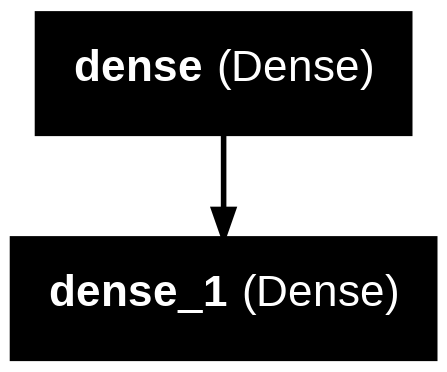

In [2]:
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics = ['accuracy'])
keras.utils.plot_model(model, to_file='model_plot.png',  show_layer_names=True)

We now have a our framework which is shown above and we can now run our data through it using the model.fit method. We will save the model to our local google drive. This is worth doing regularly as you may have to start your analysis again as third party platforms like Google Colab will shut you out after a specified time.

In [3]:
#print(x_train.shape)

history=model.fit(x_train,x_train,verbose=1,epochs=10,batch_size=256)
model.save('auto_en.h5')


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0064 - loss: 0.0685
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0119 - loss: 0.0320
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0118 - loss: 0.0237
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0121 - loss: 0.0201
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0127 - loss: 0.0181
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0132 - loss: 0.0168
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0135 - loss: 0.0159
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0133 - loss: 0.0152
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0137 - loss: 0.0146
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0139 - loss: 0.0141


In [4]:
print(history.history['loss'])

[0.05336157977581024, 0.029242882505059242, 0.02265610545873642, 0.019547337666153908, 0.017761221155524254, 0.016585910692811012, 0.01572273299098015, 0.015018429607152939, 0.014467067085206509, 0.013963297940790653]


**In this code snipet we are trying to extract the data from the hidden layer (128). We could use this data as a reduced dataset for further analysis.**

In [5]:
import tensorflow as tf

#hidden_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)

get_hidden_layer_output = tf.keras.Model([model.layers[0].input],[model.layers[1].input])
layer_output = get_hidden_layer_output([x_train])[0]
print(np.shape(layer_output))

(128,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


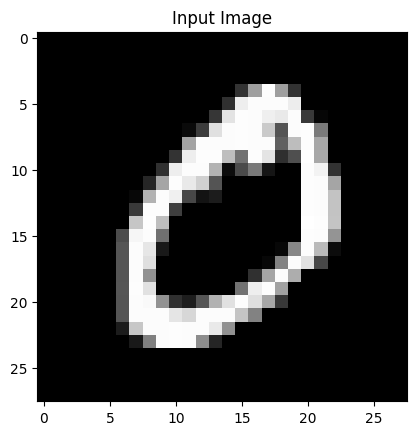

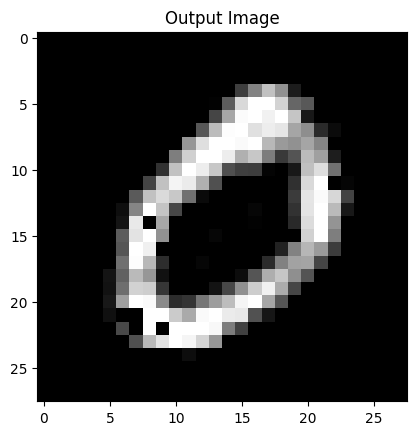

In [6]:
#from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
model = keras.models.load_model('auto_en.h5')

test = x_train[1].reshape(1,784)
y_test = model.predict(test)

inp_img = []
temp = []
for i in range(len(test[0])):
    if((i+1)%28 == 0):
        temp.append(test[0][i])
        inp_img.append(temp)
        temp = []
    else:
        temp.append(test[0][i])
out_img = []
temp = []
for i in range(len(y_test[0])):
    if((i+1)%28 == 0):
        temp.append(y_test[0][i])
        out_img.append(temp)
        temp = []
    else:
        temp.append(y_test[0][i])

inp_img = np.array(inp_img)
out_img = np.array(out_img)
#plt.imshow('Test Image',inp_img)
plt.title('Input Image')

plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
plt.show()
plt.title('Output Image')

plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
plt.show()
#cv2_imshow(inp_img)
#cv2.imshow('Output Image',out_img)
#cv2.waitKey(0)

Hopefully by now you will have got the idea of an Autoencoder. Now I would like you to try a few things before we move on and they are as follows:

* Print out a larger number of pictures.

* Run a a number of epochs  and print a graph of the Epoch number against the Loss or MSE. You may find this [code](https://keras.io/visualization/) useful.

* Do this analysis for the Boston housing data. Try and use the hidden layer as input to both a regression and Neural Network to predict housing prices.



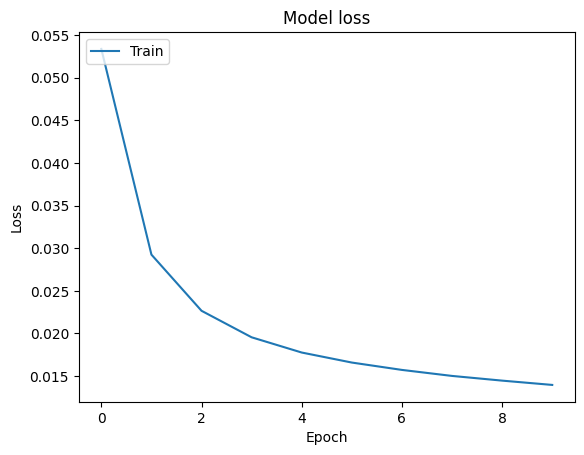

In [7]:
import matplotlib.pyplot as plt





# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()